In [133]:
import pandas as pd
pd.set_option('display.max_columns', None)  
#pd.set_option('display.expand_frame_repr', False)
#pd.set_option('max_colwidth', -1)

from sklearn import tree

In [134]:
df_prospective = pd.read_excel('H:\RediMinds\DRMahen/VCQI_PN_2014-Jun2018.xlsx', sheet_name='Prospective')

In [135]:
df_retro = pd.read_excel('H:\RediMinds\DRMahen/VCQI_PN_2014-Jun2018.xlsx', sheet_name='Retro')

In [136]:
#checking shape of dataframe
df_prospective.shape

(921, 161)

In [137]:
#checking shape of dataframe 
df_retro.shape

(2391, 161)

In [138]:
df_prospective['data_record'] = 'prospective' 

In [139]:
df_retro['data_record'] = 'retro' 

In [140]:
df = df_prospective.append(df_retro)

In [141]:
df.shape

(3312, 162)

In [142]:
df.head(10)

,PATIENT NUMBER,PROC NAME,CENTER CODE,SURGEON CODE,REC PROGRESS,CREATED DATE,GENDER,DATE OF BIRTH,AGE AT SURGERY,MARITAL STATUS,RACE,EDUCATION,WEIGHT,HEIGHT,BMI,CLINICAL SIZE (mm),ECOG,CHARLSON SCORE,CHARLSON AGE-ADJUST SCORE,SYMPTOMS,SOLITARY KIDNEY,TYPE OF SOLITARY KIDNEY,BILATERALITY OF TUMOR,SIDE OF TUMOR,SIDE OF SURGERY,PRE-OP MULTIFOCALITY,FACE,TUMOR lOCATION,PRE-OP HB,PRE-OP HT,PRE-OP WBC,PRE-OP CREAT,PRE-OP GFR,PRE-OP EGFR,PRE-OP Split Renal Function,PRE-OP ERPF,PADUA SCORE,PADUA RISK,POLAR LOCATION,RIM LOCATION,RENAL SINUS,UCS INVASION,EXOPHYTIC RATE,CLINICAL SIZE GROUP,CT,CN,CM,R.E.N.A.L. NEPHRO SCORE,R.E.N.A.L. NEPHRO RISK STRATIFICATION,RADIUS (maximal diameter in cm),EXOPHYTIC/ENDOPHYTIC PROPERTIES,NEARNESS OF TUMOUR,ANTERIOR OR POSTERIOR,LOCATION TO POLAR LINE,Tumor Consistency on Imaging,Bosniak Classification,DATE OF SURGERY,ASA SCORE,PARTIAL NEPHRO INDICATION,MULTIFOCALITY,NO OF LESIONS,Imaging Features of other excised tumor,Consistency of the other excised tumor/s,ACCESS,DA VINCI MODEL,ROBOTICS ARMS,ASSISTENT TROCARS,DUAL CONSOLE,PRIMARY SURGEON,OPERATIVE TIME(min),ISCHEMIA,CLAMP ARTERY,SELECTIVE ARTERIAL CLAMPING,CLAMP VEIN,EARLY UNCLAMPING,FLUORESCENCE,INNER RENORRHAPHY,OUTER RENORRHAPHY,ISCHEMIA TIME (min),UCS REPAIR,HAEMOSTATIC AGENTS,HAEMOSTATIC Details,LYMPH NODE DISSECTION(LND),BLOOD LOSS (ml),INTRA-OP TRANSUFUSION,SURGICAL CONSIDERATIONS,INTRA-OP COMPLICATION,INTRA-OP COMPLICATIONS,Need to Convert to Radical Nephrectomy,TREATMENT OF COMPLICATION,POST-OP COMPLICATION,SURGICAL COMPLICATIONS,NON SURGICAL COMPLICATIONS,POST-OP TREATMENT OF COMPLICATION,CLAVIEN GRADE,POST-OP HB_Day 1,POST-OP HT_Day 1,POST-OP Creat_Day 1,POST-OP EGFR_Day 1,POST-OP WBC_Day 1,POST-OP HB_Day 2,POST-OP HT_Day 2,POST-OP Creat_Day 2,POST-OP EGFR_Day 2,POST-OP WBC_Day 2,POST-OP HB_Day 3,POST-OP HT_Day 3,POST-OP Creat_Day 3,POST-OP EGFR_Day 3,POST-OP WBC_Day 3,LENGTH OF STAY (days),PATHOLOGICAL TUMOR SIZE,MIN THICKNESS MARGIN,MAX THICKNESS MARGIN,MULITIFOCALITY,PATHOLOGY,HYSTOTYPE MALIGNANAT,HYSTOTYPE MALIGNANAT YES,HYSTOTYPE BENIGN,HYSTOTYPE BENIGN YES,FUHRMAN GRADING,SARCOMATOID DIFF,%SARCOMATOID DIFF,NECROSIS,MICRO VENOUS INVASION,UCS INVASION.1,PERIRENAL FAT INVASION,Hilar Fat Invasion,SINUS FAT INVASION,MIC SCORE,ADRENAL INVASION,GEROTA INVASION,Renal Vein Invasion,VENOUS THROMBUS,SURGICAL MARGIN,UNIFOCAL/MULTIFOCAL,NO_OF_NODE_TAKEN,NO_OF_NODE_POSITIVE,SITE OF POSITIVE NODE,TREATMENT PSM,PT,PN,OTHER TUMORS,DATE OF RECURRENCE,LAST FOLLOW UP DURATION,TIME TO RECURRENCE,LAST FOLLOW UP STATUS,LAST FOLLOW UP RECURRENCE,LAST TREATMENT OF RECURRENCE,TYPE OF COMPLICATIONS(s),SELECTED SURGICAL COMPLICATIONS(s),SELECTED NON SURGICAL COMPLICATIONS(s),TREATMENT OF COMPLICATIONS(s),RECURRENCE(s),FOLLOW UP DATE(s),STATUS(s),TREATMENT(s),CREATININE(s),EGFR(s),SRF(s),ERPF(s),data_record
0,21PAT000148,Partial Nephrectomy,GQHLD5Q4,CWQW6ZDS,Follow-up1,2017-09-24 18:30:00.0,Female,1967.0,50.0,Married,Others,Graduate,57.00,168.0,20.20,7.0,"Fully active, able to carry on all pre-disease...",0.0,2.0,Absent,No,NaN,No,Left,Left,No,Posterior,Lower Pole,13.2,50,7800,0.63,67.7,100.030000,50,168.5,12.0,3(High Risk),Tumours entirely located above the upper or be...,At the medial rim (2 points),With renal sinus involvement (2 points),"With involving, dislocation or infiltration of...",< 50%exophytic (2 points),=>7cm,T2a,Nx,Not Applicable,11x,3(High Risk),=>7,<50%,=<4,Neither(x),3.0,Entirely solid,Entirely solid tumor,2017-09-24 00:00:00.0,Category 1,Elective,No,1.0,NP,Entirely solid tumor,Transperitoneal,Xi,4-arms,5 mm + 12 mm,No,Staff,3:40,Warm,Satinsky Clamp,No,Satinsky Clamp,No,Not Used,Yes,Yes,24,Performed,Yes,Surgicel+surgiflo,Not Performed,600,1 Unit,NaN,Yes,"180,310",No,NaN,No Complications,NaN,NaN,NaN,Grade 0: Absence of any complication,9.5,28.8,0.8,75.7,14600,999.0,999.0,999,999,999,999.0,999.0,999.00,999,999,5.0,8.5,0.4,0.4,Absent,Benign,No,NaN,Yes,Angiomyolipoma,999,Absent,0.0,Absent,Absent,Absent,Absent,Absent,Absent,0.0,Absent,Absent,Absent,A

In [143]:
df.describe()

,DATE OF BIRTH,AGE AT SURGERY,WEIGHT,HEIGHT,BMI,CLINICAL SIZE (mm),CHARLSON SCORE,CHARLSON AGE-ADJUST SCORE,PRE-OP CREAT,PRE-OP EGFR,PADUA SCORE,LOCATION TO POLAR LINE,NO OF LESIONS,POST-OP HB_Day 2,POST-OP HT_Day 2,POST-OP HB_Day 3,POST-OP HT_Day 3,POST-OP Creat_Day 3,LENGTH OF STAY (days),PATHOLOGICAL TUMOR SIZE,MIN THICKNESS MARGIN,MAX THICKNESS MARGIN,%SARCOMATOID DIFF,MIC SCORE,LAST FOLLOW UP DURATION
count,1919.00000,3294.000000,2327.000000,2289.00000,2958.000000,3122.000000,2737.000000,2702.000000,3264.000000,2569.000000,2123.000000,1944.000000,2678.000000,1114.000000,1154.000000,986.000000,996.000000,1199.000000,3067.000000,2781.000000,1664.000000,974.000000,1365.000000,2290.000000,1923.000000
mean,1955.81136,57.843655,90.291609,161.08460,28.906286,43.947341,1.522835,3.541451,6.943323,80.452488,8.404145,1.899177,1.053771,335.618887,349.216124,468.772809,509.636336,376.595229,3.161722,11.626124,274.839844,690.035421,14.015385,0.297817,16.916485
std,13.14144,12.702301,40.666559,29.14078,8.013751,333.125372,1.916268,2.199328,76.017258,24.170568,1.748467,0.822433,0.266591,458.270906,456.519416,490.323768,484.899641,483.504763,2.479386,40.328840,2490.582220,3321.287384,154.822902,0.457398,19.503374
min,1921.00000,0.000000,7.711150,51.00000,2.320000,0.000000,0.000000,0.000000,0.000000,0.266354,2.000000,1.000000,0.000000,1.330000,0.204000,0.300000,0.284000,0.270000,0.000000,0.000000,0.000000,0.000000,-999.000000,0.000000,-0.800000
25%,1946.00000,49.000000,69.000000,160.00000,24.610000,21.000000,0.000000,2.000000,0.780000,65.720000,7.000000,1.000000,1.000000,11.300000,31.800000,11.500000,33.075000,1.000000,2.000000,2.400000,1.000000,3.625000,0.000000,0.000000,3.000000
50%,1955.00000,59.000000,80.000000,169.00000,27.700000,30.000000,1.000000,3.000000,0.910000,79.572342,8.000000,2.000000,1.000000,13.000000,37.000000,14.350000,45.500000,1.400000,3.000000,3.500000,3.000000,999.000000,0.000000,0.000000,10.000000
75%,1965.00000,67.000000,94.750000,176.00000,31.910000,42.000000,2.000000,5.000000,1.100000,94.000000,10.000000,3.000000,1.000000,999.000000,999.000000,999.000000,999.000000,999.000000,4.000000,7.300000,11.000000,999.000000,0.000000,1.000000,24.000000
max,2015.00000,89.000000,377.000000,208.30000,304.000000,18200.000000,19.000000,14.000000,999.000000,253.971416,14.000000,3.000000,5.000000,999.000000,999.000000,999.000000,999.000000,999.000000,51.000000,999.000000,99999.000000,99999.000000,999.000000,1.000000,101.000000


In [144]:
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3312 entries, 0 to 2390
Data columns (total 162 columns):
PATIENT NUMBER                              3312 non-null object
PROC NAME                                   3312 non-null object
CENTER CODE                                 3312 non-null object
SURGEON CODE                                921 non-null object
REC PROGRESS                                3312 non-null object
CREATED DATE                                3312 non-null object
GENDER                                      3302 non-null object
DATE OF BIRTH                               1919 non-null float64
AGE AT SURGERY                              3294 non-null float64
MARITAL STATUS                              2080 non-null object
RACE                                        2016 non-null object
EDUCATION                                   1843 non-null object
WEIGHT                                      2327 non-null float64
HEIGHT                                      2

In [145]:
numeric_col_list = [
 'PRE-OP HB',
 'PRE-OP HT',
 'PRE-OP WBC',
 'PRE-OP CREAT',
 'PRE-OP GFR',
 'PRE-OP EGFR',
 'PRE-OP Split Renal Function',
 'PRE-OP ERPF',
 'PADUA SCORE',
 'PADUA RISK',
 'NO OF LESIONS',
 'POST-OP HB_Day 1',
 'POST-OP HT_Day 1',
 'POST-OP Creat_Day 1',
 'POST-OP EGFR_Day 1',
 'POST-OP WBC_Day 1',
 'POST-OP HB_Day 2',
 'POST-OP HT_Day 2',
 'POST-OP Creat_Day 2',
 'POST-OP EGFR_Day 2',
 'POST-OP WBC_Day 2',
 'POST-OP HB_Day 3',
 'POST-OP HT_Day 3',
 'POST-OP Creat_Day 3',
 'POST-OP EGFR_Day 3',
 'POST-OP WBC_Day 3',
 'LENGTH OF STAY (days)',
 'PATHOLOGICAL TUMOR SIZE',
 'MIN THICKNESS MARGIN',
 'MAX THICKNESS MARGIN',
 'FUHRMAN GRADING',
'BLOOD LOSS (ml)',
'R.E.N.A.L. NEPHRO SCORE',
'OPERATIVE TIME(min)',
'ISCHEMIA TIME (min)',
] 
numeric_col_list

['PRE-OP HB',
 'PRE-OP HT',
 'PRE-OP WBC',
 'PRE-OP CREAT',
 'PRE-OP GFR',
 'PRE-OP EGFR',
 'PRE-OP Split Renal Function',
 'PRE-OP ERPF',
 'PADUA SCORE',
 'PADUA RISK',
 'NO OF LESIONS',
 'POST-OP HB_Day 1',
 'POST-OP HT_Day 1',
 'POST-OP Creat_Day 1',
 'POST-OP EGFR_Day 1',
 'POST-OP WBC_Day 1',
 'POST-OP HB_Day 2',
 'POST-OP HT_Day 2',
 'POST-OP Creat_Day 2',
 'POST-OP EGFR_Day 2',
 'POST-OP WBC_Day 2',
 'POST-OP HB_Day 3',
 'POST-OP HT_Day 3',
 'POST-OP Creat_Day 3',
 'POST-OP EGFR_Day 3',
 'POST-OP WBC_Day 3',
 'LENGTH OF STAY (days)',
 'PATHOLOGICAL TUMOR SIZE',
 'MIN THICKNESS MARGIN',
 'MAX THICKNESS MARGIN',
 'FUHRMAN GRADING',
 'BLOOD LOSS (ml)',
 'R.E.N.A.L. NEPHRO SCORE',
 'OPERATIVE TIME(min)',
 'ISCHEMIA TIME (min)']

In [146]:
for col in numeric_col_list:
    df[col]= pd.to_numeric(df[col], errors='coerce')

In [147]:
df = df[df.columns[df.isnull().mean() < 0.30]]

In [148]:
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3312 entries, 0 to 2390
Data columns (total 79 columns):
PATIENT NUMBER                            3312 non-null object
PROC NAME                                 3312 non-null object
CENTER CODE                               3312 non-null object
REC PROGRESS                              3312 non-null object
CREATED DATE                              3312 non-null object
GENDER                                    3302 non-null object
AGE AT SURGERY                            3294 non-null float64
WEIGHT                                    2327 non-null float64
BMI                                       2958 non-null float64
CLINICAL SIZE (mm)                        3122 non-null float64
CHARLSON SCORE                            2737 non-null float64
CHARLSON AGE-ADJUST SCORE                 2702 non-null float64
SYMPTOMS                                  2486 non-null object
SOLITARY KIDNEY                           2787 non-null object
SIDE 

In [149]:
col = list(df.select_dtypes('object'))
for k in col:
    df[k] = df[k].fillna("NA")

In [150]:
col_numeric = list(df.select_dtypes('float64'))
for k in col_numeric:
    df[k] = df[k].fillna(df[k].mean())

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3312 entries, 0 to 2390
Data columns (total 79 columns):
PATIENT NUMBER                            3312 non-null object
PROC NAME                                 3312 non-null object
CENTER CODE                               3312 non-null object
REC PROGRESS                              3312 non-null object
CREATED DATE                              3312 non-null object
GENDER                                    3312 non-null object
AGE AT SURGERY                            3312 non-null float64
WEIGHT                                    3312 non-null float64
BMI                                       3312 non-null float64
CLINICAL SIZE (mm)                        3312 non-null float64
CHARLSON SCORE                            3312 non-null float64
CHARLSON AGE-ADJUST SCORE                 3312 non-null float64
SYMPTOMS                                  3312 non-null object
SOLITARY KIDNEY                           3312 non-null object
SIDE 

In [152]:
df.head(10)

,PATIENT NUMBER,PROC NAME,CENTER CODE,REC PROGRESS,CREATED DATE,GENDER,AGE AT SURGERY,WEIGHT,BMI,CLINICAL SIZE (mm),CHARLSON SCORE,CHARLSON AGE-ADJUST SCORE,SYMPTOMS,SOLITARY KIDNEY,SIDE OF SURGERY,FACE,TUMOR lOCATION,PRE-OP HB,PRE-OP HT,PRE-OP CREAT,PRE-OP EGFR,POLAR LOCATION,EXOPHYTIC RATE,CLINICAL SIZE GROUP,CT,CN,CM,R.E.N.A.L. NEPHRO RISK STRATIFICATION,RADIUS (maximal diameter in cm),EXOPHYTIC/ENDOPHYTIC PROPERTIES,ANTERIOR OR POSTERIOR,DATE OF SURGERY,ASA SCORE,PARTIAL NEPHRO INDICATION,NO OF LESIONS,ACCESS,ROBOTICS ARMS,ASSISTENT TROCARS,DUAL CONSOLE,ISCHEMIA,CLAMP ARTERY,CLAMP VEIN,EARLY UNCLAMPING,FLUORESCENCE,ISCHEMIA TIME (min),UCS REPAIR,HAEMOSTATIC AGENTS,LYMPH NODE DISSECTION(LND),BLOOD LOSS (ml),INTRA-OP TRANSUFUSION,INTRA-OP COMPLICATION,POST-OP COMPLICATION,POST-OP Creat_Day 1,POST-OP EGFR_Day 1,LENGTH OF STAY (days),PATHOLOGICAL TUMOR SIZE,MULITIFOCALITY,PATHOLOGY,HYSTOTYPE MALIGNANAT,HYSTOTYPE MALIGNANAT YES,HYSTOTYPE BENIGN,FUHRMAN GRADING,MICRO VENOUS INVASION,PERIRENAL FAT INVASION,SURGICAL MARGIN,PT,TYPE OF COMPLICATIONS(s),SELECTED SURGICAL COMPLICATIONS(s),SELECTED NON SURGICAL COMPLICATIONS(s),TREATMENT OF COMPLICATIONS(s),RECURRENCE(s),FOLLOW UP DATE(s),STATUS(s),TREATMENT(s),CREATININE(s),EGFR(s),SRF(s),ERPF(s),data_record
0,21PAT000148,Partial Nephrectomy,GQHLD5Q4,Follow-up1,2017-09-24 18:30:00.0,Female,50.0,57.00,20.20,7.0,0.0,2.000000,Absent,No,Left,Posterior,Lower Pole,13.2,50.000,0.63,100.030000,Tumours entirely located above the upper or be...,< 50%exophytic (2 points),=>7cm,T2a,Nx,Not Applicable,3(High Risk),=>7,<50%,Neither(x),2017-09-24 00:00:00.0,Category 1,Elective,1.0,Transperitoneal,4-arms,5 mm + 12 mm,No,Warm,Satinsky Clamp,Satinsky Clamp,No,Not Used,24.00,Performed,Yes,Not Performed,600.0,1 Unit,Yes,No Complications,0.80,75.70,5.0,8.5,Absent,Benign,No,NA,Yes,999.0,Absent,Absent,Negative,Benign,(FUP1 : No Complications),(FUP1 : NULL),(FUP1 : NULL),(FUP1 : ),(FUP1 : None),(FUP1 : 2017-10-10),(FUP1 : Alive and disease free),(FUP1 : None),(FUP1 : 1),(FUP1 : NP),(FUP1 : NP),(FUP1 : NP),prospective
1,18PAT000042,Partial Nephrectomy,GCIEYK6L,Follow-up1,2016-03-08 08:00:00.0,Female,69.0,68.60,26.37,74.0,1.0,4.000000,Absent,No,Right,Posterior,Mid Pole,14.7,44.200,0.80,71.119672,Tumours crossing the sinus line >50% or fallin...,= 50% exophytic (1 point),=>7cm,T2a,Nx,M0,2(Intermidiate Risk),=>7,50%,Posterior (p),2016-03-09 00:00:00.0,Category 3,Relative,1.0,Retroperitoneal,4-arms,Only 12 mm,Yes,Warm,Bulldog,No,Yes,Used,15.00,Performed,No,Not Performed,300.0,No,No,No Complications,0.79,76.91,1.0,8.5,Absent,Benign,No,NA,Yes,999.0,Absent,Absent,Negative,Benign,(FUP1 : No Complications),(FUP1 : NULL),(FUP1 : NULL),(FUP1 : ),(FUP1 : None),(FUP1 : 2016-05-31),(FUP1 : Alive and disease free),(FUP1 : None),(FUP1 : .67),(FUP1 : 84.27),(FUP1 : NP),(FUP1 : NP),prospective
2,7PAT000058,Partial Nephrectomy,4M49I4D5,Follow-up1,2016-01-01 23:00:00.0,Female,83.0,83.65,31.10,80.0,3.0,8.000000,Absent,No,Left,Anterior,Lower Pole,12.5,38.900,0.97,54.844682,Tumours entirely located above the upper or be...,= 50% exophytic (1 point),=>7cm,T2a,N0,M0,2(Intermidiate Risk),=>7,50%,Anterior (a),2016-01-04 00:00:00.0,Category 2,Elective,1.0,Transperitoneal,4-arms,Only 12 mm,No,Warm,Bulldog,No,Yes,Not Used,15.16,Performed,Yes,Not Performed,700.0,No,No,Complications,1.06,50.00,11.0,7.5,Absent,Malign,Yes,Clear cell renal cell carcinoma,No,2.0,Absent,Absent,Negative,T2a,(FUP1 : No Complications),(FUP1 : NULL),(FUP1 : NULL),(FUP1 : ),(FUP1 : None),(FUP1 : 2015-12-29),(FUP1 : Alive and disease free),(FUP1 : None),(FUP1 : 0.85),(FUP1 : 60),(FUP1 : NA),(FUP1 : NA),prospective
3,3PAT000044,Partial Nephrectomy,FWL0MH42,Follow-up1,2015-02-24 00:00:00.0,Male,66.0,235.00,32.78,73.0,2.0,5.000000,Absent,No,Right,Posterior,Upper Pole,17.0,50.800,0.93,81.290783,Tumours entirely located above the upper or be...,= 50% exophytic (1 point),=>7cm,T1b,N0,M0,2(Intermidiate Risk),=>7,50%,Posterior (p),2015-02-25 00:00:00.0,Category 2,Elective,1.0,

In [153]:
col = list(df.select_dtypes('object'))
unique_count_list = {col:len(df[col].unique()) for col in col}
unique_count_list

{'PATIENT NUMBER': 3312,
 'PROC NAME': 1,
 'CENTER CODE': 20,
 'REC PROGRESS': 12,
 'CREATED DATE': 684,
 'GENDER': 3,
 'SYMPTOMS': 4,
 'SOLITARY KIDNEY': 3,
 'SIDE OF SURGERY': 4,
 'FACE': 3,
 'TUMOR lOCATION': 4,
 'POLAR LOCATION': 3,
 'EXOPHYTIC RATE': 4,
 'CLINICAL SIZE GROUP': 4,
 'CT': 7,
 'CN': 4,
 'CM': 4,
 'R.E.N.A.L. NEPHRO RISK STRATIFICATION': 5,
 'RADIUS (maximal diameter in cm)': 4,
 'EXOPHYTIC/ENDOPHYTIC PROPERTIES': 4,
 'ANTERIOR OR POSTERIOR': 4,
 'DATE OF SURGERY': 1807,
 'ASA SCORE': 5,
 'PARTIAL NEPHRO INDICATION': 4,
 'ACCESS': 3,
 'ROBOTICS ARMS': 4,
 'ASSISTENT TROCARS': 3,
 'DUAL CONSOLE': 3,
 'ISCHEMIA': 4,
 'CLAMP ARTERY': 5,
 'CLAMP VEIN': 5,
 'EARLY UNCLAMPING': 3,
 'FLUORESCENCE': 3,
 'UCS REPAIR': 3,
 'HAEMOSTATIC AGENTS': 3,
 'LYMPH NODE DISSECTION(LND)': 3,
 'INTRA-OP TRANSUFUSION': 4,
 'INTRA-OP COMPLICATION': 3,
 'POST-OP COMPLICATION': 3,
 'MULITIFOCALITY': 3,
 'PATHOLOGY': 3,
 'HYSTOTYPE MALIGNANAT': 3,
 'HYSTOTYPE MALIGNANAT YES': 10,
 'HYSTOTYPE BE

In [154]:
for col in unique_count_list:
    if unique_count_list[col]<10:
        df[col] = df[col].astype('category')

In [155]:
list(df.select_dtypes('object'))

['PATIENT NUMBER',
 'CENTER CODE',
 'REC PROGRESS',
 'CREATED DATE',
 'DATE OF SURGERY',
 'HYSTOTYPE MALIGNANAT YES',
 'TYPE OF COMPLICATIONS(s)',
 'SELECTED SURGICAL COMPLICATIONS(s)',
 'SELECTED NON SURGICAL COMPLICATIONS(s)',
 'TREATMENT OF COMPLICATIONS(s)',
 'RECURRENCE(s)',
 'FOLLOW UP DATE(s)',
 'STATUS(s)',
 'TREATMENT(s)',
 'CREATININE(s)',
 'EGFR(s)',
 'SRF(s)',
 'ERPF(s)']

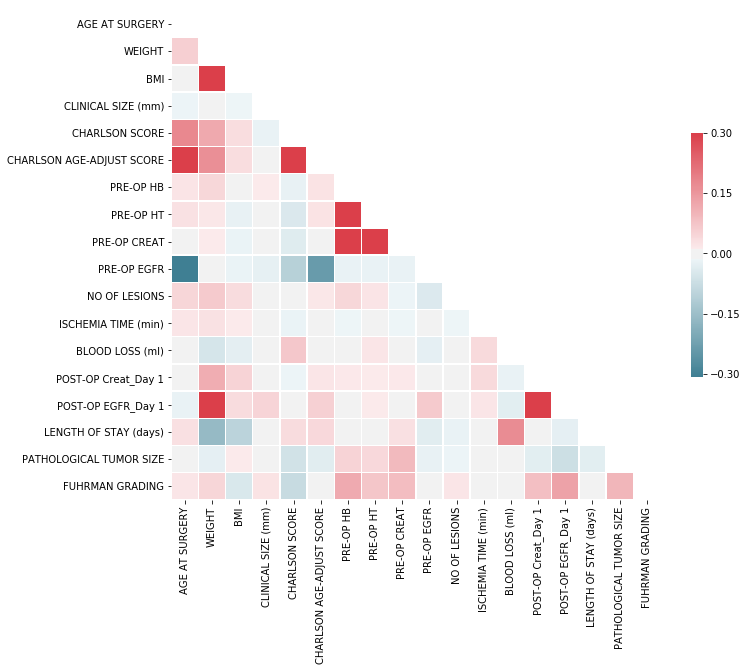

In [156]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [157]:
#need ot work from here
list(df)

['PATIENT NUMBER',
 'PROC NAME',
 'CENTER CODE',
 'REC PROGRESS',
 'CREATED DATE',
 'GENDER',
 'AGE AT SURGERY',
 'WEIGHT',
 'BMI',
 'CLINICAL SIZE (mm)',
 'CHARLSON SCORE',
 'CHARLSON AGE-ADJUST SCORE',
 'SYMPTOMS',
 'SOLITARY KIDNEY',
 'SIDE OF SURGERY',
 'FACE',
 'TUMOR lOCATION',
 'PRE-OP HB',
 'PRE-OP HT',
 'PRE-OP CREAT',
 'PRE-OP EGFR',
 'POLAR LOCATION',
 'EXOPHYTIC RATE',
 'CLINICAL SIZE GROUP',
 'CT',
 'CN',
 'CM',
 'R.E.N.A.L. NEPHRO RISK STRATIFICATION',
 'RADIUS (maximal diameter in cm)',
 'EXOPHYTIC/ENDOPHYTIC PROPERTIES',
 'ANTERIOR OR POSTERIOR',
 'DATE OF SURGERY',
 'ASA SCORE',
 'PARTIAL NEPHRO INDICATION',
 'NO OF LESIONS',
 'ACCESS',
 'ROBOTICS ARMS',
 'ASSISTENT TROCARS',
 'DUAL CONSOLE',
 'ISCHEMIA',
 'CLAMP ARTERY',
 'CLAMP VEIN',
 'EARLY UNCLAMPING',
 'FLUORESCENCE',
 'ISCHEMIA TIME (min)',
 'UCS REPAIR',
 'HAEMOSTATIC AGENTS',
 'LYMPH NODE DISSECTION(LND)',
 'BLOOD LOSS (ml)',
 'INTRA-OP TRANSUFUSION',
 'INTRA-OP COMPLICATION',
 'POST-OP COMPLICATION',
 'POST-O

In [158]:
df_filter_intra_op = df[['PROC NAME',
 'GENDER',
 'AGE AT SURGERY',
 'BMI',
 'CLINICAL SIZE (mm)',
 'CHARLSON SCORE',
 'CHARLSON AGE-ADJUST SCORE',
 'SYMPTOMS',
 'SOLITARY KIDNEY',
 'SIDE OF SURGERY',
 'FACE',
 'TUMOR lOCATION',
 'PRE-OP HB',
 'PRE-OP HT',
 'PRE-OP CREAT',
 'PRE-OP EGFR',
 'POLAR LOCATION',
 'EXOPHYTIC RATE',
 'CLINICAL SIZE GROUP',
 'CT',
 'CN',
 'CM',
 'R.E.N.A.L. NEPHRO RISK STRATIFICATION',
 'RADIUS (maximal diameter in cm)',
 'EXOPHYTIC/ENDOPHYTIC PROPERTIES',
 'ANTERIOR OR POSTERIOR',
 'ASA SCORE',
 'PARTIAL NEPHRO INDICATION',
 'NO OF LESIONS',
 'ACCESS',
 'ROBOTICS ARMS',
 'ASSISTENT TROCARS',
 'DUAL CONSOLE',
 'ISCHEMIA',
 'CLAMP ARTERY',
 'CLAMP VEIN',
 'EARLY UNCLAMPING',
 'FLUORESCENCE',
 'ISCHEMIA TIME (min)',
 'UCS REPAIR',
 'HAEMOSTATIC AGENTS',
 'LYMPH NODE DISSECTION(LND)',
 'BLOOD LOSS (ml)',
 'INTRA-OP TRANSUFUSION',
 'INTRA-OP COMPLICATION',
                         
 'POST-OP COMPLICATION']]

In [159]:
df_filter_intra_op.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3312 entries, 0 to 2390
Data columns (total 46 columns):
PROC NAME                                3312 non-null category
GENDER                                   3312 non-null category
AGE AT SURGERY                           3312 non-null float64
BMI                                      3312 non-null float64
CLINICAL SIZE (mm)                       3312 non-null float64
CHARLSON SCORE                           3312 non-null float64
CHARLSON AGE-ADJUST SCORE                3312 non-null float64
SYMPTOMS                                 3312 non-null category
SOLITARY KIDNEY                          3312 non-null category
SIDE OF SURGERY                          3312 non-null category
FACE                                     3312 non-null category
TUMOR lOCATION                           3312 non-null category
PRE-OP HB                                3312 non-null float64
PRE-OP HT                                3312 non-null float64
PRE-

In [160]:
df_filter2 = df_filter_intra_op[df_filter_intra_op['POST-OP COMPLICATION'] != 'NA']

In [161]:
df_filter2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2722 entries, 0 to 2376
Data columns (total 46 columns):
PROC NAME                                2722 non-null category
GENDER                                   2722 non-null category
AGE AT SURGERY                           2722 non-null float64
BMI                                      2722 non-null float64
CLINICAL SIZE (mm)                       2722 non-null float64
CHARLSON SCORE                           2722 non-null float64
CHARLSON AGE-ADJUST SCORE                2722 non-null float64
SYMPTOMS                                 2722 non-null category
SOLITARY KIDNEY                          2722 non-null category
SIDE OF SURGERY                          2722 non-null category
FACE                                     2722 non-null category
TUMOR lOCATION                           2722 non-null category
PRE-OP HB                                2722 non-null float64
PRE-OP HT                                2722 non-null float64
PRE-

In [162]:
columns=df_filter2.select_dtypes('category')
df_filter2_codes = df_filter2.copy()
from sklearn.preprocessing import LabelEncoder
le_dict = {col: LabelEncoder() for col in columns }
for col in columns:
    le_dict[col].fit_transform(df_filter2_codes[col])

In [163]:
label_mapping = dict()


In [164]:
label_mapping = {col: dict(zip(le_dict[col].classes_,le_dict[col].transform(le_dict[col].classes_))) for col in columns}
label_mapping

{'PROC NAME': {'Partial Nephrectomy': 0},
 'GENDER': {'Female': 0, 'Male': 1, 'NA': 2},
 'SYMPTOMS': {'Absent': 0,
  'Local Symptoms': 1,
  'NA': 2,
  'Systemic Symptoms': 3},
 'SOLITARY KIDNEY': {'NA': 0, 'No': 1, 'Yes': 2},
 'SIDE OF SURGERY': {'Bilateral': 0, 'Left': 1, 'NA': 2, 'Right': 3},
 'FACE': {'Anterior': 0, 'NA': 1, 'Posterior': 2},
 'TUMOR lOCATION': {'Lower Pole': 0, 'Mid Pole': 1, 'NA': 2, 'Upper Pole': 3},
 'POLAR LOCATION': {'NA': 0,
  'Tumours crossing the sinus line >50% or falling entirely between the sinus lines (2 points)': 1,
  'Tumours entirely located above the upper or below the lower sinus line, or crossing the sinus line < 50% (1 point)': 2},
 'EXOPHYTIC RATE': {'< 50%exophytic (2 points)': 0,
  '= 50% exophytic (1 point)': 1,
  'Endophytic (3 points)': 2,
  'NA': 3},
 'CLINICAL SIZE GROUP': {'4.1cm-7cm': 0, '=<4cm': 1, '=>7cm': 2, 'NA': 3},
 'CT': {'NA': 0, 'T1a': 1, 'T1b': 2, 'T2a': 3, 'T2b': 4, 'T3a': 5, 'T3b': 6},
 'CN': {'N+': 0, 'N0': 1, 'NA': 2, 'Nx':

In [165]:
#df_filter2_codes = df_filter2
for col in columns:
    df_filter2_codes[col] = le_dict[col].transform(df_filter2_codes[col])
    

In [166]:
for col in columns:
    df_filter2_codes[col] = df_filter2_codes[col].astype('category')

In [167]:
df_filter2.head()

,PROC NAME,GENDER,AGE AT SURGERY,BMI,CLINICAL SIZE (mm),CHARLSON SCORE,CHARLSON AGE-ADJUST SCORE,SYMPTOMS,SOLITARY KIDNEY,SIDE OF SURGERY,FACE,TUMOR lOCATION,PRE-OP HB,PRE-OP HT,PRE-OP CREAT,PRE-OP EGFR,POLAR LOCATION,EXOPHYTIC RATE,CLINICAL SIZE GROUP,CT,CN,CM,R.E.N.A.L. NEPHRO RISK STRATIFICATION,RADIUS (maximal diameter in cm),EXOPHYTIC/ENDOPHYTIC PROPERTIES,ANTERIOR OR POSTERIOR,ASA SCORE,PARTIAL NEPHRO INDICATION,NO OF LESIONS,ACCESS,ROBOTICS ARMS,ASSISTENT TROCARS,DUAL CONSOLE,ISCHEMIA,CLAMP ARTERY,CLAMP VEIN,EARLY UNCLAMPING,FLUORESCENCE,ISCHEMIA TIME (min),UCS REPAIR,HAEMOSTATIC AGENTS,LYMPH NODE DISSECTION(LND),BLOOD LOSS (ml),INTRA-OP TRANSUFUSION,INTRA-OP COMPLICATION,POST-OP COMPLICATION
0,Partial Nephrectomy,Female,50.0,20.20,7.0,0.0,2.000000,Absent,No,Left,Posterior,Lower Pole,13.2,50.0,0.63,100.030000,Tumours entirely located above the upper or be...,< 50%exophytic (2 points),=>7cm,T2a,Nx,Not Applicable,3(High Risk),=>7,<50%,Neither(x),Category 1,Elective,1.0,Transperitoneal,4-arms,5 mm + 12 mm,No,Warm,Satinsky Clamp,Satinsky Clamp,No,Not Used,24.00,Performed,Yes,Not Performed,600.0,1 Unit,Yes,No Complications
1,Partial Nephrectomy,Female,69.0,26.37,74.0,1.0,4.000000,Absent,No,Right,Posterior,Mid Pole,14.7,44.2,0.80,71.119672,Tumours crossing the sinus line >50% or fallin...,= 50% exophytic (1 point),=>7cm,T2a,Nx,M0,2(Intermidiate Risk),=>7,50%,Posterior (p),Category 3,Relative,1.0,Retroperitoneal,4-arms,Only 12 mm,Yes,Warm,Bulldog,No,Yes,Used,15.00,Performed,No,Not Performed,300.0,No,No,No Complications
2,Partial Nephrectomy,Female,83.0,31.10,80.0,3.0,8.000000,Absent,No,Left,Anterior,Lower Pole,12.5,38.9,0.97,54.844682,Tumours entirely located above the upper or be...,= 50% exophytic (1 point),=>7cm,T2a,N0,M0,2(Intermidiate Risk),=>7,50%,Anterior (a),Category 2,Elective,1.0,Transperitoneal,4-arms,Only 12 mm,No,Warm,Bulldog,No,Yes,Not Used,15.16,Performed,Yes,Not Performed,700.0,No,No,Complications
3,Partial Nephrectomy,Male,66.0,32.78,73.0,2.0,5.000000,Absent,No,Right,Posterior,Upper Pole,17.0,50.8,0.93,81.290783,Tumours entirely located above the upper or be...,= 50% exophytic (1 point),=>7cm,T1b,N0,M0,2(Intermidiate Risk),=>7,50%,Posterior (p),Category 2,Elective,1.0,Transperitoneal,4-arms,Only 12 mm,Yes,Warm,No,No,No,Not Used,30.00,Not Performed,No,Performed,2000.0,No,No,No Complications
4,Partial Nephrectomy,Male,61.0,28.35,8.0,0.0,3.541451,Absent,No,Right,Posterior,Mid Pole,12.1,37.1,1.10,68.053260,Tumours crossing the sinus line >50% or fallin...,< 50%exophytic (2 points),=>7cm,T2a,N0,M0,3(High Risk),=>7,<50%,Neither(x),Category 2,Elective,1.0,Transperitoneal,4-arms,Only 12 mm,No,Warm,Bulldog,Bulldog,No,Not Used,20.00,Performed,Yes,Not Performed,300.0,No,No,No Complications


In [168]:
df_filter2_codes.head()

,PROC NAME,GENDER,AGE AT SURGERY,BMI,CLINICAL SIZE (mm),CHARLSON SCORE,CHARLSON AGE-ADJUST SCORE,SYMPTOMS,SOLITARY KIDNEY,SIDE OF SURGERY,FACE,TUMOR lOCATION,PRE-OP HB,PRE-OP HT,PRE-OP CREAT,PRE-OP EGFR,POLAR LOCATION,EXOPHYTIC RATE,CLINICAL SIZE GROUP,CT,CN,CM,R.E.N.A.L. NEPHRO RISK STRATIFICATION,RADIUS (maximal diameter in cm),EXOPHYTIC/ENDOPHYTIC PROPERTIES,ANTERIOR OR POSTERIOR,ASA SCORE,PARTIAL NEPHRO INDICATION,NO OF LESIONS,ACCESS,ROBOTICS ARMS,ASSISTENT TROCARS,DUAL CONSOLE,ISCHEMIA,CLAMP ARTERY,CLAMP VEIN,EARLY UNCLAMPING,FLUORESCENCE,ISCHEMIA TIME (min),UCS REPAIR,HAEMOSTATIC AGENTS,LYMPH NODE DISSECTION(LND),BLOOD LOSS (ml),INTRA-OP TRANSUFUSION,INTRA-OP COMPLICATION,POST-OP COMPLICATION
0,0,0,50.0,20.20,7.0,0.0,2.000000,0,1,1,2,0,13.2,50.0,0.63,100.030000,2,0,2,3,3,3,3,2,1,2,0,1,1.0,2,1,0,1,3,3,3,1,1,24.00,2,2,1,600.0,0,2,1
1,0,0,69.0,26.37,74.0,1.0,4.000000,0,1,3,2,1,14.7,44.2,0.80,71.119672,1,1,2,3,3,1,2,2,0,3,2,3,1.0,1,1,2,2,3,0,2,2,2,15.00,2,1,1,300.0,3,1,1
2,0,0,83.0,31.10,80.0,3.0,8.000000,0,1,1,0,0,12.5,38.9,0.97,54.844682,2,1,2,3,1,1,2,2,0,0,1,1,1.0,2,1,2,1,3,0,2,2,1,15.16,2,2,1,700.0,3,1,0
3,0,1,66.0,32.78,73.0,2.0,5.000000,0,1,3,2,3,17.0,50.8,0.93,81.290783,2,1,2,2,1,1,2,2,0,3,1,1,1.0,2,1,2,2,3,2,2,1,1,30.00,1,1,2,2000.0,3,1,1
4,0,1,61.0,28.35,8.0,0.0,3.541451,0,1,3,2,1,12.1,37.1,1.10,68.053260,1,0,2,3,1,1,3,2,1,2,1,1,1.0,2,1,2,1,3,0,0,1,1,20.00,2,2,1,300.0,3,1,1


In [169]:
#X = df_filter.drop(columns=['INTRA-OP COMPLICATION'])
X = df_filter2_codes.drop(columns=['POST-OP COMPLICATION'])
Y = df_filter2_codes['POST-OP COMPLICATION']
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2722 entries, 0 to 2376
Data columns (total 45 columns):
PROC NAME                                2722 non-null category
GENDER                                   2722 non-null category
AGE AT SURGERY                           2722 non-null float64
BMI                                      2722 non-null float64
CLINICAL SIZE (mm)                       2722 non-null float64
CHARLSON SCORE                           2722 non-null float64
CHARLSON AGE-ADJUST SCORE                2722 non-null float64
SYMPTOMS                                 2722 non-null category
SOLITARY KIDNEY                          2722 non-null category
SIDE OF SURGERY                          2722 non-null category
FACE                                     2722 non-null category
TUMOR lOCATION                           2722 non-null category
PRE-OP HB                                2722 non-null float64
PRE-OP HT                                2722 non-null float64
PRE-

In [170]:
X.head(1)

,PROC NAME,GENDER,AGE AT SURGERY,BMI,CLINICAL SIZE (mm),CHARLSON SCORE,CHARLSON AGE-ADJUST SCORE,SYMPTOMS,SOLITARY KIDNEY,SIDE OF SURGERY,FACE,TUMOR lOCATION,PRE-OP HB,PRE-OP HT,PRE-OP CREAT,PRE-OP EGFR,POLAR LOCATION,EXOPHYTIC RATE,CLINICAL SIZE GROUP,CT,CN,CM,R.E.N.A.L. NEPHRO RISK STRATIFICATION,RADIUS (maximal diameter in cm),EXOPHYTIC/ENDOPHYTIC PROPERTIES,ANTERIOR OR POSTERIOR,ASA SCORE,PARTIAL NEPHRO INDICATION,NO OF LESIONS,ACCESS,ROBOTICS ARMS,ASSISTENT TROCARS,DUAL CONSOLE,ISCHEMIA,CLAMP ARTERY,CLAMP VEIN,EARLY UNCLAMPING,FLUORESCENCE,ISCHEMIA TIME (min),UCS REPAIR,HAEMOSTATIC AGENTS,LYMPH NODE DISSECTION(LND),BLOOD LOSS (ml),INTRA-OP TRANSUFUSION,INTRA-OP COMPLICATION
0,0,0,50.0,20.2,7.0,0.0,2.0,0,1,1,2,0,13.2,50.0,0.63,100.03,2,0,2,3,3,3,3,2,1,2,0,1,1.0,2,1,0,1,3,3,3,1,1,24.0,2,2,1,600.0,0,2


In [171]:
Y.head(1)

0    1
Name: POST-OP COMPLICATION, dtype: category
Categories (2, int64): [0, 1]

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [173]:
clf = tree.DecisionTreeClassifier(min_samples_leaf=20)
clf = clf.fit(X_train, Y_train)

In [174]:
clf


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

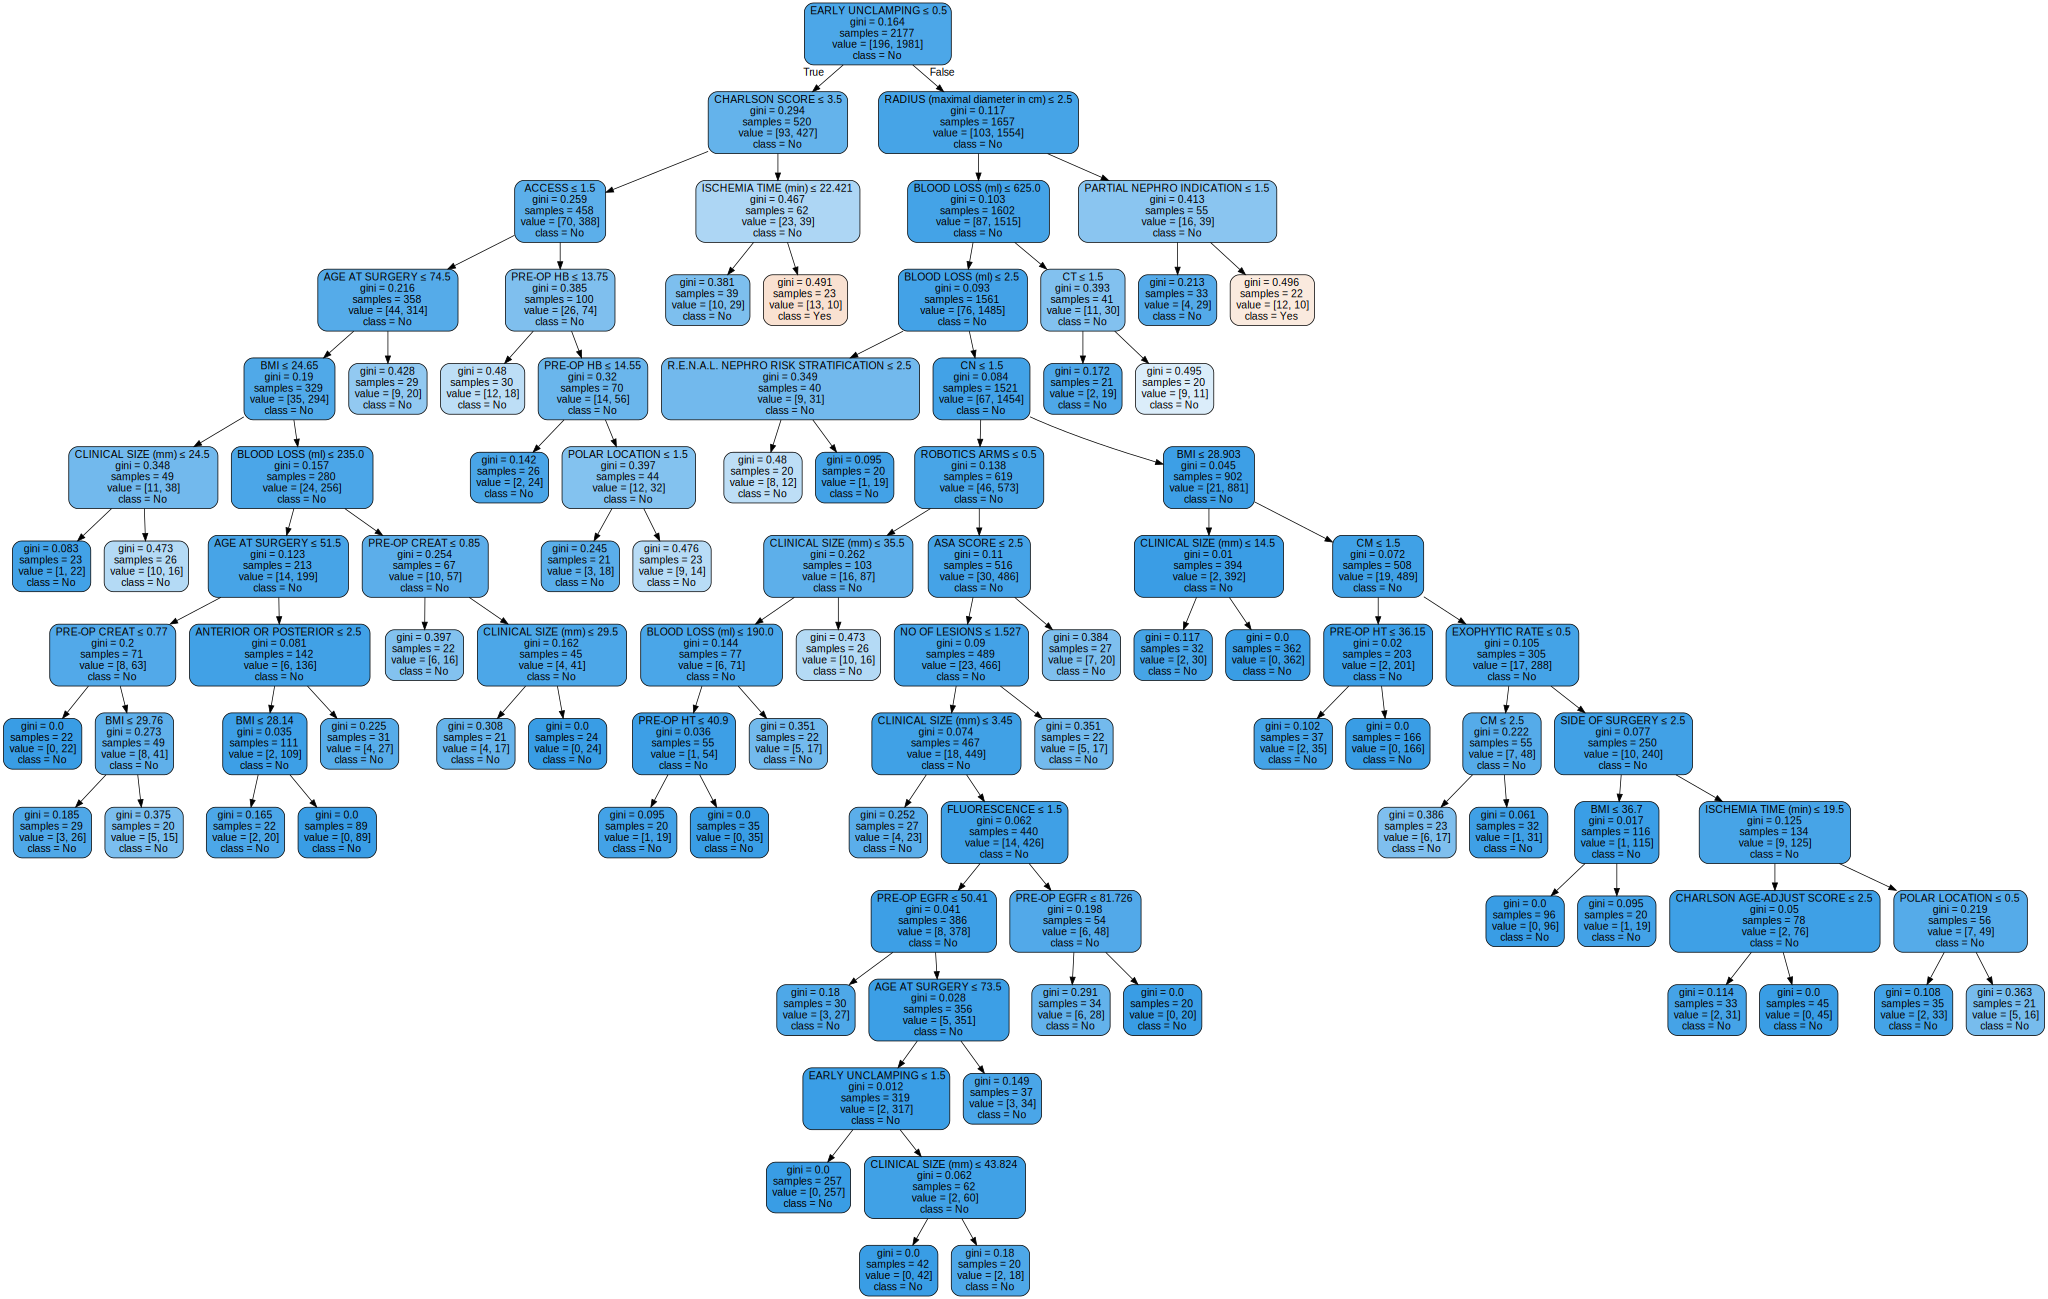

In [196]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=list(X),  
                         class_names=['Yes','No'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render("H:\RediMinds\DRMahen/post_op_complications")
#graph.write_pdf("H:\RediMinds\DRMahen/iris.pdf")
graph 

In [176]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import math
model = DecisionTreeClassifier()
parameter_dist = { 'max_features':["auto",'sqrt','log2',None],'max_depth': list(range(1,50)),
                  'min_samples_leaf': [10]}  
classifier = GridSearchCV(model, parameter_dist, n_jobs = -1, scoring = 'balanced_accuracy', cv = 5)
results = classifier.fit(X_train, Y_train)
classifier.cv_results_
y_best_params = classifier.best_params_
y_best_score = classifier.best_score_
y = classifier.predict(X_test)





In [177]:
import graphviz
dot_data = tree.export_graphviz(classifier.best_estimator_, out_file=None, 
                         feature_names=list(X),  
                         class_names=['Yes','No'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render("H:\RediMinds\DRMahen/post_op_complications")
#graph.write_pdf("H:\RediMinds\DRMahen/iris.pdf")


'H:\\RediMinds\\DRMahen/post_op_complications.pdf'

In [178]:
print(y_best_params)
print("\n Model Accuracy: \n"+str(metrics.accuracy_score(Y_test, y)))
print("\n Model Balanced Accuracy: \n" + str(metrics.balanced_accuracy_score(Y_test, y)))

print("\n Confusion Matrix: \n"+ str(metrics.classification_report(Y_test, y)))

{'max_depth': 20, 'max_features': None, 'min_samples_leaf': 10}

 Model Accuracy: 
0.9119266055045872

 Model Balanced Accuracy: 
0.5685674106332789

 Confusion Matrix: 
              precision    recall  f1-score   support

           0       0.39      0.16      0.23        44
           1       0.93      0.98      0.95       501

   micro avg       0.91      0.91      0.91       545
   macro avg       0.66      0.57      0.59       545
weighted avg       0.89      0.91      0.89       545



In [179]:
feature_importances = pd.DataFrame(classifier.best_estimator_.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

,importance
BMI,0.106224
CLINICAL SIZE (mm),0.097768
EARLY UNCLAMPING,0.096330
ISCHEMIA TIME (min),0.081447
BLOOD LOSS (ml),0.080259
AGE AT SURGERY,0.077229
CHARLSON SCORE,0.058153
RADIUS (maximal diameter in cm),0.054360
PRE-OP CREAT,0.050678
DUAL CONSOLE,0.043050


In [180]:
np.unique(y)

array([0, 1], dtype=int64)

In [203]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import math
model = RandomForestClassifier(random_state= 42)
parameter_dist = {'n_estimators': [1,5,10,20,100,200,300], 'max_features':['auto','sqrt','log2'],
  'min_samples_leaf': [1,5,10,25,20], 'class_weight' :['balanced','balanced_subsample'] 
}  
classifier_RFR = GridSearchCV(model, parameter_dist, n_jobs = -1,cv=5, scoring = 'balanced_accuracy', return_train_score=True)
results = classifier_RFR.fit(X_train, Y_train)


y_RFR_best_params = classifier_RFR.best_params_
y_RFR_best_score = classifier_RFR.best_score_
y_RFR = classifier_RFR.predict(X_test)




In [204]:
y_RFR_best_score

0.6648768146224957

In [205]:
feature_importances = pd.DataFrame(classifier_RFR.best_estimator_.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

,importance
DUAL CONSOLE,0.075424
PRE-OP HT,0.068735
CN,0.065475
CLINICAL SIZE (mm),0.063450
PRE-OP CREAT,0.054639
ISCHEMIA TIME (min),0.051802
RADIUS (maximal diameter in cm),0.044572
BMI,0.044040
CHARLSON AGE-ADJUST SCORE,0.037766
BLOOD LOSS (ml),0.036702


In [220]:
print("\n Best Parameter \n"+str(y_RFR_best_params))
print("\n Best Model validation balanced accuracy  \n" + str(y_RFR_best_score))
print("\n Model Accuracy Score \n"+str(metrics.accuracy_score(Y_test, y_RFR)))
print("\n Model Balanced Accuracy \n"+str(metrics.balanced_accuracy_score(Y_test, y_RFR)))
print("\n Classification report\n "+str(metrics.classification_report(Y_test, y_RFR)))
print("\n Confusion mtrix \n" + str(metrics.confusion_matrix(Y_test, y_RFR)))


 Best Parameter 
{'class_weight': 'balanced', 'max_features': 'auto', 'min_samples_leaf': 20, 'n_estimators': 20}

 Best Model validation balanced accuracy  
0.6648768146224957

 Model Accuracy Score 
0.7376146788990826

 Model Balanced Accuracy 
0.6707040464525494

 Classification report
               precision    recall  f1-score   support

           0       0.17      0.59      0.27        44
           1       0.95      0.75      0.84       501

   micro avg       0.74      0.74      0.74       545
   macro avg       0.56      0.67      0.55       545
weighted avg       0.89      0.74      0.79       545


 Confusion mtrix 
[[ 26  18]
 [125 376]]


f1=0.840 auc=0.850 ap=0.946


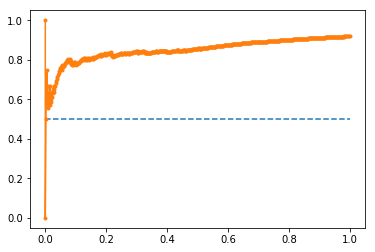

In [207]:
from matplotlib import pyplot
# predict probabilities
probs = classifier_RFR.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 0]
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(Y_test, probs)


# calculate F1 score
f1 = metrics.f1_score(Y_test, y_RFR)


# calculate precision-recall AUC
auc = metrics.auc(recall, precision)



# calculate average precision score
ap = metrics.average_precision_score(Y_test, y_RFR)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the roc curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

In [208]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [209]:
dict_unique = {col:list(df_filter2[col].unique()) for col in X.select_dtypes('category')}

In [210]:
label_mapping_post_op = {col: dict(zip(le_dict[col].classes_,le_dict[col].transform(le_dict[col].classes_))) for col in X.select_dtypes('category')}
label_mapping_post_op

{'PROC NAME': {'Partial Nephrectomy': 0},
 'GENDER': {'Female': 0, 'Male': 1, 'NA': 2},
 'SYMPTOMS': {'Absent': 0,
  'Local Symptoms': 1,
  'NA': 2,
  'Systemic Symptoms': 3},
 'SOLITARY KIDNEY': {'NA': 0, 'No': 1, 'Yes': 2},
 'SIDE OF SURGERY': {'Bilateral': 0, 'Left': 1, 'NA': 2, 'Right': 3},
 'FACE': {'Anterior': 0, 'NA': 1, 'Posterior': 2},
 'TUMOR lOCATION': {'Lower Pole': 0, 'Mid Pole': 1, 'NA': 2, 'Upper Pole': 3},
 'POLAR LOCATION': {'NA': 0,
  'Tumours crossing the sinus line >50% or falling entirely between the sinus lines (2 points)': 1,
  'Tumours entirely located above the upper or below the lower sinus line, or crossing the sinus line < 50% (1 point)': 2},
 'EXOPHYTIC RATE': {'< 50%exophytic (2 points)': 0,
  '= 50% exophytic (1 point)': 1,
  'Endophytic (3 points)': 2,
  'NA': 3},
 'CLINICAL SIZE GROUP': {'4.1cm-7cm': 0, '=<4cm': 1, '=>7cm': 2, 'NA': 3},
 'CT': {'NA': 0, 'T1a': 1, 'T1b': 2, 'T2a': 3, 'T2b': 4, 'T3a': 5, 'T3b': 6},
 'CN': {'N+': 0, 'N0': 1, 'NA': 2, 'Nx':

In [211]:
numeric_post_op = {col: "numeric" for col in X.select_dtypes('float64')}

In [212]:
f = open("H:\RediMinds\DRMahen/label_mapping_post_op.txt","w")
f.write( str(label_mapping_post_op) )
f.close()

In [213]:
f = open("H:\RediMinds\DRMahen/numeric_intra_op.txt","w")
f.write( str(numeric_post_op) )
f.close()

In [214]:
# open the file for writing
import pickle
#serializing our model to a file called model.pkl
pickle.dump(classifier_RFR, open("H:\RediMinds\DRMahen/model_post_op.pkl","wb"))

# this writes the object to the open file


In [215]:
#loading a model from a file called model.pkl
model = pickle.load(open("H:\RediMinds\DRMahen/model_post_op.pkl","rb"))

In [216]:
model.predict_proba(X_test)

array([[0.20543595, 0.79456405],
       [0.37843862, 0.62156138],
       [0.37678652, 0.62321348],
       ...,
       [0.29646288, 0.70353712],
       [0.618981  , 0.381019  ],
       [0.36554044, 0.63445956]])

In [217]:
from platform import python_version
print(python_version())

3.6.6
